<div style="text-align: center;">
    <h1 style="margin-bottom: 0;"><b>PCA Analysis of Food Consumption in European Countries</b></h1>
    <h2 style="margin-top: 10px; margin-bottom:0;">Chase Diaz</h2>
</div>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import math
import random
import scipy.sparse.linalg as ll

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('food-consumption.csv')
df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,21,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,2,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,5,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,14,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,12,76,76,42,57,29,84,80,83,20,5
5,Luxembourg,97,61,86,28,79,73,12,7,26,23,85,94,83,20,91,94,94,84,31,24
6,England,27,86,99,22,91,55,76,17,20,24,76,68,89,91,11,95,94,57,11,28
7,Portugal,72,26,77,2,22,34,1,5,20,3,22,51,8,16,89,65,78,92,6,9
8,Austria,55,31,61,15,29,33,1,5,15,11,49,42,14,41,51,51,72,28,13,11
9,Switzerland,73,72,85,25,31,69,10,17,19,15,79,70,46,61,64,82,48,61,48,30


In [15]:
df = df.to_numpy()
# food consumption
X = df[:,1:]
# countries
Y = df[:,0]

## **Implementing PCA from scratch**

1. take a matrix of feature vectors (data) as input

2. normalize the data by dividing each element by its correspodning standard deviation

3. compute the mean-centered matrix by subtracting the mean from each feature

4. calculate the covariance matrix of the mean-centered data

5. perform eigenvalue decomposition on the covariance matrix to obtain eigenvalues and eigenvectors

6. extract the first two principal components by projecting the mean-centered data onto the eigenvectors and normalizing

7. return the first 2 principal components

In [16]:
def get_PCA(X):
    '''
    X: matrix of feature vectors
    
    returns first 2 principle components from X
    '''
    X = X.astype(float)
    # std of each feature (row-wise)
    stds = np.std(X, axis=0)
    # normalize feature vector matrix by dividing each value by its std
    X = X @ np.diag(np.ones(stds.shape[0]) / stds)
    # take the transpose of the matrix
    X = X.T
    
    ### PCA 
    means = np.mean(X, axis=1)
    # subtract the mean of each row from the corresponding elements in the input matrix
    X_centered = X - means[:,None]
    # covariance matrix
    C = np.dot(X_centered, X_centered.T)/X.shape[0]
    
    ### eigenvalue decomposition
    K = 2
    S,W = ll.eigs(C,k = K)
    S = S.real
    W = W.real

    dim1 = np.dot(W[:,0].T,X_centered)/math.sqrt(S[0]) # extract 1st eigenvalues
    dim2 = np.dot(W[:,1].T,X_centered)/math.sqrt(S[1]) # extract 2nd eigenvalue

    return dim1, dim2

## **PCA of European Countries Food Consumption**

#### **How is the data matrix set up? What do the columns and rows of the matrix correspond to?**
- The data read from the file is arranged in the matrix form m x n, where m = 16 corresponds to the countries, and n = 20 to the foods. If we consider foods as the features, then we treat each row in the data matrix as a point, with 20 dimensions for each point.

#### **What patterns do we see in the plot and what do they tell us?**
- We see that countries with similar diets are clustered together. For example, the Scandinavian countries (Denmark, Sweden, Norway and Finland), who have similar diets are located close to one another. We see the same with Spain, Italy, and Portugal who have similar Mediterranean diets. Countries with similar diet and food consumptions are clustered close to one another, while countries that are distant from one another such as Portugal and England, have opposite preferences.

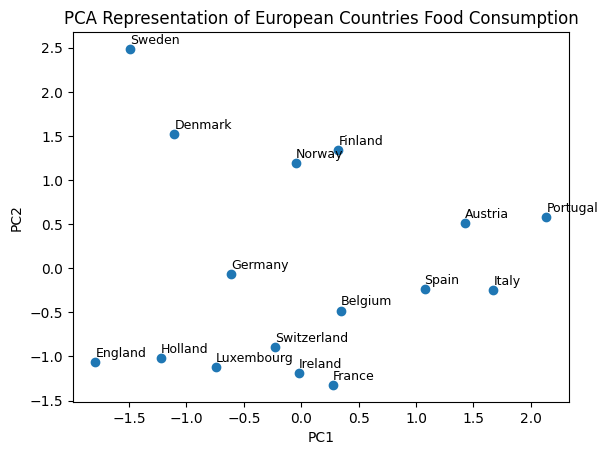

In [19]:
PC1, PC2 = get_PCA(X)
#print("PC1 shape", PC1.shape)
#print("PC2 shape", PC2.shape)

plt.scatter(PC1, PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, (x,y) in enumerate(zip(PC1, PC2)):
    plt.annotate(Y[i], xy=(x,y), xytext=(x, y + 0.1), ha="left", va="center", fontsize=9)
plt.title('PCA Representation of European Countries Food Consumption')
plt.show()

## **PCA of Foods Consumed by European Countries**

- Now we will perform PCA on the foods consumtion data by treating the country consumptions as feature vectors for each food item. This will tell us which food preferences are correlated between European countries. 

- The difference between this PCA analysis and our previous scatter chart is we are now treating the foods as our labels. 

#### **What does this PCA plot tell us?**

- Foods consumed in similar diets will be clustered closer to one another. We see that garlic and olive oil have the most distinctive preference pattern, countries either strongly prefer or do not prefer these foods. Real coffee and tin soup have negatively correlated preferences, placed on opposite sides of the plot, telling us that countries tend to either prefer real coffee and dislike tin soup, or prefer tin soup and dislike real coffee. 

In [9]:
df = pd.read_csv('food-consumption.csv')
df = df.to_numpy()
### transpose and remove countries col
df_T = df.T
X = df_T[1:,:]
Y = ['Real coffee', 'Instant coffee', 'Tea', 'Sweetener', 'Biscuits', 'Powder soup','Tin soup','Potatoes','Frozen fish','Frozen vegatables', 'Apples','Oranges','Tinned fruit','Jam','Garlic','Butter','Margarine','Olive oil','Yoghurt','Crisp bread']

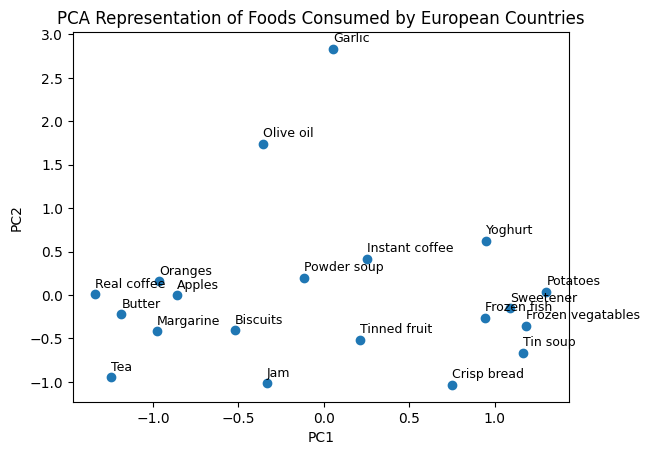

In [10]:
PC1, PC2 = get_PCA(X)
#print("PC1 shape: ", PC1.shape)
#print("PC2 shape: ", PC2.shape)

plt.scatter(PC1, PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, (x,y) in enumerate(zip(PC1, PC2)):
    plt.annotate(Y[i], xy=(x, y), xytext=(x, y + 0.12), ha="left", va="center", fontsize=9)
    plt.title('PCA Representation of Foods Consumed by European Countries')
plt.show()